In [1]:
# (1) Importing the Required Libraries;

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# (2) Load the IMDB Reviews dataset;

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

In [3]:
# (3) Pad the sequences to have equal length;

max_len = 500

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

#                  Build the Model

In [4]:
# (4) Set the input and output dimensions;

input_dim = 10000
output_dim = 1

In [5]:
# (5) Create the input layer;

inputs = tf.keras.Input(shape=(None,), dtype="int32")

In [6]:
# (6) Create the model;

x = tf.keras.layers.Embedding(input_dim, 128)(inputs)

x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)

x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)

outputs = tf.keras.layers.Dense(output_dim, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)

In [7]:
# (7) Compile the model;

model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

#                          Train

In [8]:
# (8) Train the model;

batch_size = 32

epochs = 5

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 892s 1s/step - loss: 0.3941 - accuracy: 0.8189 - val_loss: 0.3002 - val_accuracy: 0.8730
Epoch 2/5
782/782 [==============================] - 846s 1s/step - loss: 0.3918 - accuracy: 0.8178 - val_loss: 0.5058 - val_accuracy: 0.7415
Epoch 3/5
782/782 [==============================] - 1355s 2s/step - loss: 0.3827 - accuracy: 0.8264 - val_loss: 0.4032 - val_accuracy: 0.8256
Epoch 4/5
782/782 [==============================] - 1393s 2s/step - loss: 0.2215 - accuracy: 0.9141 - val_loss: 0.3305 - val_accuracy: 0.8690
Epoch 5/5
782/782 [==============================] - 870s 1s/step - loss: 0.1489 - accuracy: 0.9445 - val_loss: 0.3692 - val_accuracy: 0.8647


#                        Accuracy

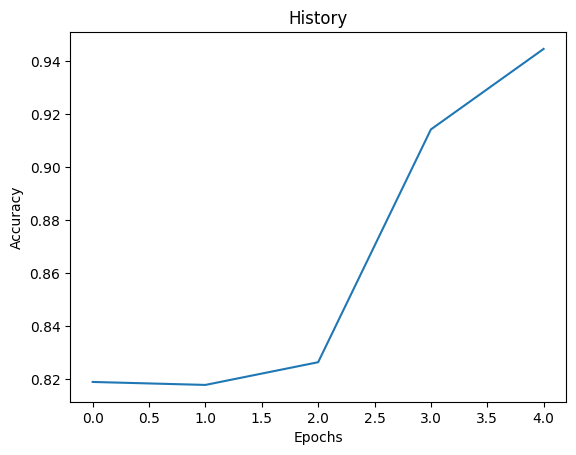

In [9]:
# (9) Plot the Accuracy;

fig = plt.plot(history.history['accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")

#                          Predict

In [10]:
# (10) Prediction Data;

predictions = model.predict(x_test[:4])

for pred in predictions:
    print(np.argmax(pred))

1/1 [==============================] - 2s 2s/step
0
0
0
0
